In [36]:
import os
import cv2
import math
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

In [37]:
training_data = pd.read_csv('UNSW_training_P-value.csv')

In [38]:
training_data = training_data.drop(['attack_cat'], axis = 1)

In [39]:
training_data.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,123041.020944,141321.008087,117163.991557,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,123041.020944,141321.008087,117163.991557,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,123041.020944,141321.008087,117163.991557,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,123041.020944,4979.997301,117163.991557,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,123041.020944,141321.008087,117163.991557,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


In [40]:
features = training_data.dtypes.index[0:39]
scaler = QuantileTransformer()
training_data[features] = scaler.fit_transform(training_data[features])

In [41]:
training_data[features] = training_data[features].apply(lambda x: (x*255))

In [42]:
training_data.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,127.619618,153.914165,164.567872,152.634609,127.516456,98.145327,127.459333,98.031402,127.568797,127.375765,...,91.590141,77.520783,118.176267,3.705444,3.705444,24.639359,119.978667,120.204131,4.016826,0.680622
std,73.600782,95.805287,99.498222,93.464506,69.209228,98.291983,73.233022,98.250501,73.751432,61.912843,...,99.904690,101.533213,84.950644,30.399387,30.399387,73.217580,83.268430,83.249532,31.751457,0.466237
min,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,...,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000000
25%,65.983483,92.530030,83.596096,82.064565,66.238739,0.000025,38.798799,0.000025,63.736068,74.917417,...,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,86.531532,75.810811,0.000025,0.000000
50%,127.859792,92.530030,254.999975,82.064565,66.238739,129.669670,127.176022,127.755255,127.467991,171.403904,...,0.000025,0.000025,116.906907,0.000025,0.000025,0.000025,125.585586,122.905405,0.000025,1.000000
75%,191.363160,254.999975,254.999975,254.999975,187.484985,189.399399,191.395031,191.278178,193.228228,171.403904,...,191.313814,187.484985,191.441441,0.000025,0.000025,0.000025,189.782282,191.824324,0.000025,1.000000
max,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,...,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,1.000000


In [43]:
training_data.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,157.258501,254.999975,254.999975,254.999975,136.816817,138.986486,120.990991,128.283998,86.510014,88.060376,...,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0
1,190.024832,254.999975,254.999975,254.999975,196.291291,229.346847,152.030761,242.793245,88.002545,74.917417,...,0.000025,0.000025,86.786787,0.000025,0.000025,0.000025,0.000025,154.301802,0.000025,0
2,231.453943,254.999975,254.999975,254.999975,140.645646,204.842342,124.436937,232.554084,22.745954,74.917417,...,0.000025,0.000025,116.906907,0.000025,0.000025,0.000025,86.531532,154.301802,0.000025,0
3,232.285481,254.999975,6.381381,254.999975,187.484985,197.312312,149.409409,184.634635,21.783536,74.917417,...,0.000025,0.000025,116.906907,253.085586,253.085586,0.000025,86.531532,0.000025,0.000025,0
4,176.412826,254.999975,254.999975,254.999975,162.597598,150.600601,133.626126,143.836336,64.428992,171.403904,...,152.642643,0.000025,252.064565,0.000025,0.000025,0.000025,86.531532,251.426426,0.000025,0


In [44]:
train_normal_df = training_data[training_data['label']==0].drop(['label'],axis=1)
train_attack_df = training_data[training_data['label']==1].drop(['label'],axis=1)

In [45]:
train_normal_df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,157.258501,254.999975,254.999975,254.999975,136.816817,138.986486,120.990991,128.283998,86.510014,88.060376,...,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025
1,190.024832,254.999975,254.999975,254.999975,196.291291,229.346847,152.030761,242.793245,88.002545,74.917417,...,0.000025,0.000025,0.000025,86.786787,0.000025,0.000025,0.000025,0.000025,154.301802,0.000025
2,231.453943,254.999975,254.999975,254.999975,140.645646,204.842342,124.436937,232.554084,22.745954,74.917417,...,106.058559,0.000025,0.000025,116.906907,0.000025,0.000025,0.000025,86.531532,154.301802,0.000025
3,232.285481,254.999975,6.381381,254.999975,187.484985,197.312312,149.409409,184.634635,21.783536,74.917417,...,106.058559,0.000025,0.000025,116.906907,253.085586,253.085586,0.000025,86.531532,0.000025,0.000025
4,176.412826,254.999975,254.999975,254.999975,162.597598,150.600601,133.626126,143.836336,64.428992,171.403904,...,106.058559,152.642643,0.000025,252.064565,0.000025,0.000025,0.000025,86.531532,251.426426,0.000025


In [46]:
train_attack_df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
47911,90.360360,3.828829,254.999975,82.064565,66.238739,0.000025,103.378378,0.000025,168.596096,171.403904,...,0.000025,0.000025,0.000025,138.731231,0.000025,0.000025,0.000025,86.531532,122.905405,0.000025
47912,90.360360,9.937103,254.999975,82.064565,66.238739,0.000025,103.378378,0.000025,168.596096,171.403904,...,106.058559,152.642643,170.638138,175.998498,0.000025,0.000025,0.000025,86.531532,165.660661,0.000025
47913,90.360360,5.870871,254.999975,82.064565,66.238739,0.000025,103.378378,0.000025,168.596096,171.403904,...,0.000025,0.000025,0.000025,167.192192,0.000025,0.000025,0.000025,0.000025,154.301802,0.000025
47914,20.420420,14.039039,254.999975,82.064565,66.238739,0.000025,103.378378,0.000025,238.408408,171.403904,...,106.058559,152.642643,170.638138,175.998498,0.000025,0.000025,0.000025,86.531532,154.301802,0.000025
47915,65.983483,7.657658,254.999975,82.064565,66.238739,0.000025,103.378378,0.000025,193.228228,171.403904,...,0.000025,0.000025,0.000025,138.731231,0.000025,0.000025,0.000025,196.291291,122.905405,0.000025


In [47]:
image_path = "Selected Features/Train/0/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = train_normal_df.shape[1] * 3
img = []

count = 0

for i, rows in train_normal_df.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, train_normal_df.shape[1], train_normal_df.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [49]:
image_path = "Selected Features/Train/1/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = train_attack_df.shape[1] * 3
img = []

count = 0

for i, rows in train_attack_df.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, train_attack_df.shape[1], train_attack_df.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [50]:
testing_data = pd.read_csv('UNSW_testing_P-value.csv') #UNSW_training_Anova-Chi2

In [51]:
testing_data = testing_data.drop(['attack_cat'], axis = 1)

In [52]:
testing_data.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,92700.995071,141321.008087,116438.010265,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,92700.995071,141321.008087,116438.010265,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,92700.995071,141321.008087,116438.010265,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,92700.995071,141321.008087,116438.010265,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,92700.995071,141321.008087,116438.010265,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [53]:
features = testing_data.dtypes.index[0:39]
scaler = QuantileTransformer() 
testing_data[features] = scaler.fit_transform(testing_data[features])

In [54]:
testing_data.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.384384,0.298298,1.0,0.314815,0.236236,1.000000e-07,0.459860,1.000000e-07,0.628128,0.671171,...,1.000000e-07,1.000000e-07,0.401902,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.257257,1.000000e-07,0
1,0.233734,0.298298,1.0,0.314815,0.236236,1.000000e-07,0.812604,1.000000e-07,0.781281,0.671171,...,1.000000e-07,1.000000e-07,0.401902,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.257257,1.000000e-07,0
2,0.145646,0.298298,1.0,0.314815,0.236236,1.000000e-07,0.724224,1.000000e-07,0.868869,0.671171,...,1.000000e-07,1.000000e-07,0.523524,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.360360,1.000000e-07,0
3,0.171672,0.298298,1.0,0.314815,0.236236,1.000000e-07,0.648649,1.000000e-07,0.842843,0.671171,...,5.950951e-01,1.000000e-07,0.523524,1.000000e-07,1.000000e-07,1.000000e-07,3.498498e-01,0.360360,1.000000e-07,0
4,0.348348,0.298298,1.0,0.314815,0.236236,1.000000e-07,0.823490,1.000000e-07,0.665666,0.671171,...,5.950951e-01,1.000000e-07,0.523524,1.000000e-07,1.000000e-07,1.000000e-07,3.498498e-01,0.360360,1.000000e-07,0


In [55]:
testing_data[features] = testing_data[features].apply(lambda x: (x*255))

In [56]:
testing_data.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,127.485691,162.469887,169.163790,156.624682,127.449555,103.126127,127.489276,103.116676,127.465323,127.410495,...,92.428511,72.872817,113.399598,2.090535,2.096785,22.397560,119.084201,122.311122,2.837075,0.550600
std,73.613752,98.709262,101.024051,96.104153,69.951138,96.000875,73.202655,96.043318,73.609771,61.916173,...,99.939186,101.376719,89.351655,22.941859,22.976308,70.343599,84.139052,80.751543,26.747099,0.497436
min,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,...,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000000
25%,59.602102,76.066066,75.810811,80.277778,60.240240,0.000025,41.734234,0.000025,63.736011,71.343844,...,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,65.600601,0.000025,0.000000
50%,127.431349,254.999975,254.999975,80.277778,127.117117,119.969970,124.436937,124.947447,127.473933,171.148649,...,0.000025,0.000025,133.498498,0.000025,0.000025,0.000025,127.627628,131.966967,0.000025,1.000000
75%,191.257561,254.999975,254.999975,254.999975,190.803303,191.186186,191.186186,191.186186,182.890390,171.148649,...,193.100601,193.993994,188.761261,0.000025,0.000025,0.000025,188.888889,192.590090,0.000025,1.000000
max,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,...,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,254.999975,1.000000


In [57]:
test_normal_df = testing_data[testing_data['label']==0].drop(['label'],axis=1)
test_attack_df = testing_data[testing_data['label']==1].drop(['label'],axis=1)

In [58]:
test_normal_df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,98.018018,76.066066,254.999975,80.277778,60.24024,0.000025,117.264264,0.000025,160.172673,171.148649,...,0.000025,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,65.600601,0.000025
1,59.602102,76.066066,254.999975,80.277778,60.24024,0.000025,207.214089,0.000025,199.226727,171.148649,...,0.000025,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,65.600601,0.000025
2,37.139640,76.066066,254.999975,80.277778,60.24024,0.000025,184.677177,0.000025,221.561562,171.148649,...,0.000025,0.000025,0.000025,133.498498,0.000025,0.000025,0.000025,0.000025,91.891892,0.000025
3,43.776276,76.066066,254.999975,80.277778,60.24024,0.000025,165.405405,0.000025,214.924925,171.148649,...,107.590090,151.749249,0.000025,133.498498,0.000025,0.000025,0.000025,89.211712,91.891892,0.000025
4,88.828829,76.066066,254.999975,80.277778,60.24024,0.000025,209.989990,0.000025,169.744745,171.148649,...,107.590090,151.749249,0.000025,133.498498,0.000025,0.000025,0.000025,89.211712,91.891892,0.000025


In [59]:
test_attack_df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
243,206.167439,15.442943,254.999975,80.277778,215.307808,0.000025,191.186186,0.000025,40.228071,171.148649,...,0.000025,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025
244,206.167439,15.442943,254.999975,80.277778,215.307808,0.000025,191.186186,0.000025,40.228071,171.148649,...,0.000025,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025
245,206.167439,15.442943,254.999975,80.277778,215.307808,0.000025,191.186186,0.000025,40.228071,171.148649,...,0.000025,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025
246,206.167439,15.442943,254.999975,80.277778,215.307808,0.000025,191.186186,0.000025,40.228071,171.148649,...,0.000025,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025
247,72.109610,14.294294,254.999975,80.277778,60.240240,0.000025,11.486486,0.000025,182.890390,171.148649,...,107.590090,0.000025,0.000025,102.484985,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025


In [60]:
image_path = "Selected Features/Test/0/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = test_normal_df.shape[1] * 3
img = []

count = 0

for i, rows in test_normal_df.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, test_normal_df.shape[1], test_normal_df.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [61]:
image_path = "Selected Features/Test/1/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = test_attack_df.shape[1] * 3
img = []

count = 0

for i, rows in test_attack_df.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, test_attack_df.shape[1], test_attack_df.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [62]:
def resize_images(image_source, image_dir):
    imgfilepaths = []
    
    # Collect file paths of images in image_source directory
    for root, dirs, imgs in os.walk(image_source):
        for thisimg in imgs:
            thisimg_path = os.path.join(root, thisimg)
            imgfilepaths.append(thisimg_path)
    
    # Resize and save each image
    for thisimg_path in imgfilepaths:
        dir_name, filename = os.path.split(thisimg_path)
        new_file_path = os.path.join(image_dir, filename)
        
        img = cv2.imread(thisimg_path)
        resized_img = cv2.resize(img, (224, 224))
        
        cv2.imwrite(new_file_path, resized_img)
    
    print('Finish resizing and saving images.')


In [63]:
# Specify the source directory and destination directory
image_source = 'Selected Features/Train/0/'
image_dir = 'Selected Features/Train_224x224/0/'

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [64]:
# Specify the source directory and destination directory
image_source = 'Selected Features/Train/1/'
image_dir = 'Selected Features/Train_224x224/1/'

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [65]:
# Specify the source directory and destination directory
image_source = 'Selected Features/Test/0/'
image_dir = 'Selected Features/Test_224x224/0/'

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [66]:
# Specify the source directory and destination directory
image_source = 'Selected Features/Test/1/'
image_dir = 'Selected Features/Test_224x224/1/'

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


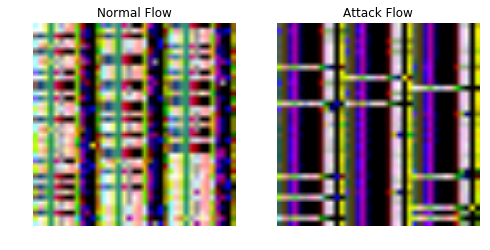

In [72]:
train_normal = "Selected Features/Train_224x224/0/"
train_attack = "Selected Features/Train_224x224/1/"

train_normal_images = [os.path.join(train_normal, filename) for filename in os.listdir(train_normal) if filename.endswith(".png")]
train_attack_images = [os.path.join(train_attack, filename) for filename in os.listdir(train_attack) if filename.endswith(".png")]

random_image1 = random.choice(train_normal_images)
random_image2 = random.choice(train_attack_images)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
image1 = Image.open(random_image1)
plt.imshow(image1)
plt.title("Normal Flow")
plt.axis("off")

plt.subplot(1, 2, 2)
image2 = Image.open(random_image2)
plt.imshow(image2)
plt.title("Attack Flow")
plt.axis("off")

plt.show()

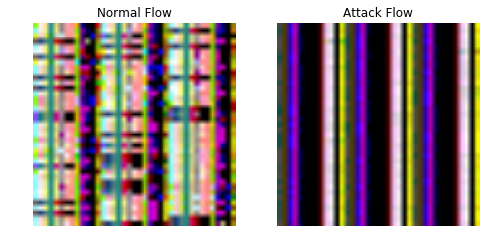

In [70]:
test_normal = "Selected Features/Test_224x224/0/"
test_attack = "Selected Features/Test_224x224/1/"

test_normal_images = [os.path.join(test_normal, filename) for filename in os.listdir(test_normal) if filename.endswith(".png")]
test_attack_images = [os.path.join(test_attack, filename) for filename in os.listdir(test_attack) if filename.endswith(".png")]

img1 = random.choice(test_normal_images)
img2 = random.choice(test_attack_images)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
image1 = Image.open(img1)
plt.imshow(image1)
plt.title("Normal Flow")
plt.axis("off")

plt.subplot(1, 2, 2)
image2 = Image.open(img2)
plt.imshow(image2)
plt.title("Attack Flow")
plt.axis("off")

plt.show()
